[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HSFT: No data found for this date range, symbol may be delisted


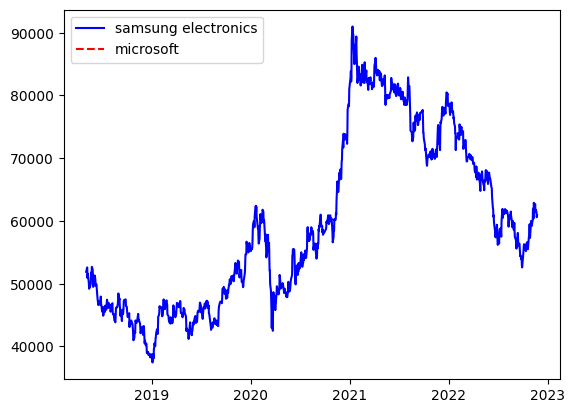

In [15]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('hsft',start='2018-05-04')

In [6]:
print(sec.index)

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2022-11-10', '2022-11-11', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21',
               '2022-11-22', '2022-11-23'],
              dtype='datetime64[ns]', name='Date', length=1120, freq=None)


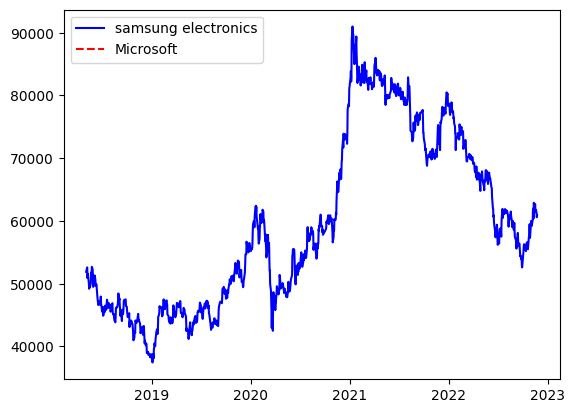

In [20]:
import matplotlib.pyplot as plt
plt.plot(sec.index, sec.Close,'b',label='samsung electronics')
plt.plot(msft.index, msft.Close,'r--',label='Microsoft')
plt.legend(loc='best')
plt.show()
#ms는 수치차이가 커 주가는 거의 0에 가까운 직선으로 표시됨

In [29]:
print(sec['Close'].shift(1))

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2022-11-17    62700.0
2022-11-18    61400.0
2022-11-21    61800.0
2022-11-22    61400.0
2022-11-23    60600.0
Name: Close, Length: 1120, dtype: float64


In [33]:
sec_dpc=(sec['Close']/sec['Close'].shift(1)-1)*100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

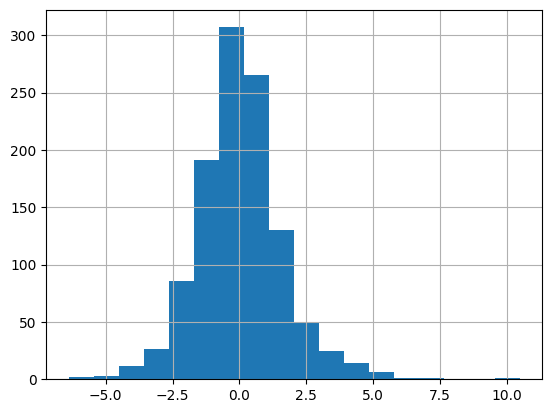

In [50]:
sec_dpc.iloc[0]=0
plt.hist(sec_dpc, bins=18) #일간 변동률 18개 구간
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


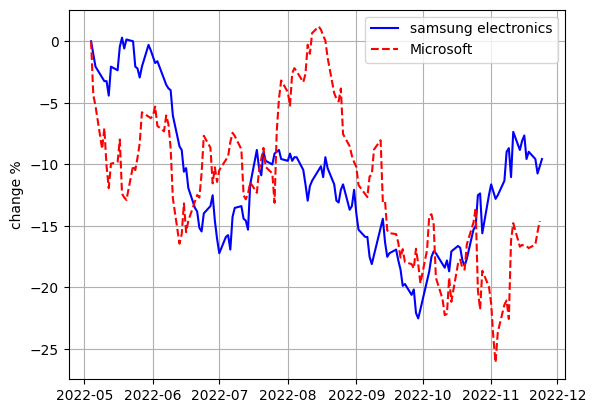

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2022-05-04')
sec_dpc = (sec['Close']-sec['Close'].shift(1))/sec['Close'].shift(1)*100
sec_dpc.iloc[0]=0
sec_dpc_cp = ((100+sec_dpc)/100).cumprod()*100-100

msft = pdr.get_data_yahoo('msft',start='2022-05-04')
msft_dpc = (msft['Close']/msft['Close'].shift(1)-1)*100
msft_dpc.iloc[0]=0
msft_dpc_cp=((100+msft_dpc)/100).cumprod()*100-100

import matplotlib.pyplot as plt
plt.plot(sec.index, sec_dpc_cp,'b',label='samsung electronics')
plt.plot(msft.index, msft_dpc_cp,'r--',label='Microsoft')
plt.ylabel('change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed


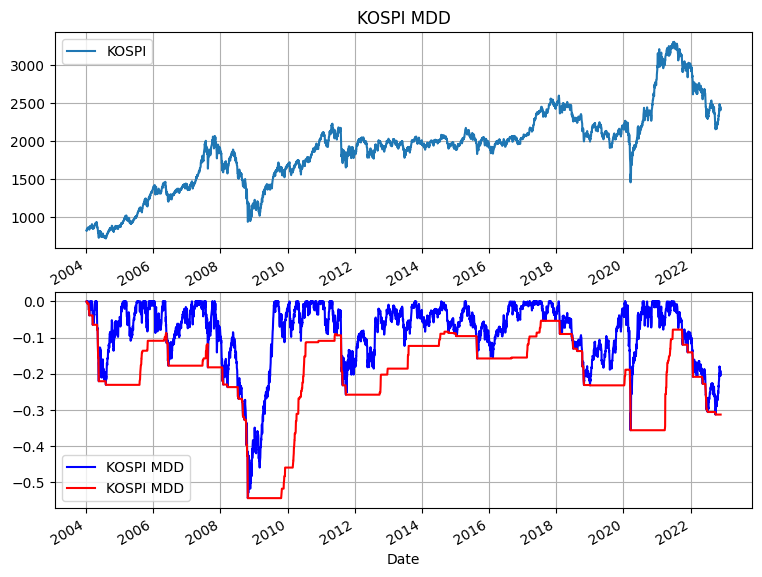

In [4]:
#MDD 특정 기간에 발생한 최고점에서 최저점까지의 가장 큰 손실을 의미
#퀸트 투자에서는 수익률을 높이는 것보다 MDD를 낮추는 것이 더 낫다고 할 많큼 중요한 지표         MDD= (최저점-최고점)/최저점
#특정 기간 동안 최대한 얼마의 손실이 날 수 있는지 나타낸다.

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
kospi = pdr.get_data_yahoo('^KS11','2004-01-04') #kospi지수 데이터 다운로드 kospi지수 심볼은 ^ks11

window = 252 #산정기간에 해당하는 window값은 1년 동안의 개장일을 252일로 어림잡아 설정
peak = kospi['Adj Close'].rolling(window,min_periods=1).max() #kospi종가 칼럼에서 1년 기간 단위로 최고치  peak를 구한다.
drawdown = kospi['Adj Close']/peak - 1.0 #drawdown은 최고치(peak)대비 현재 kospi 종가가 얼마나 하락햇는지를 구한다.
max_dd = drawdown.rolling(window, min_periods=1).min() #darwdown에서 1년 기간 단위로 최저치 max_dd를 구한다. 마이너스값이기 때문에 최저치가 바로 최대 손실 낙폭이 된다.

plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI',title='KOSPI MDD',grid=True,legend=True)
plt.subplot(212)
drawdown.plot(c='blue',label='KOSPI MDD',grid=True,legend=True)
max_dd.plot(c='red',label='KOSPI MDD',grid=True,legend=True)
plt.show()